In [5]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from nltk import word_tokenize, sent_tokenize


In [7]:
corpus = "Sachin was the GOAT of the previous generation. Virat is the GOAT of this generation. Shubman will be the GOAT of the next generation"

In [8]:
import string 
corpus=corpus.translate(corpus.maketrans("","",string.punctuation))
corpus

'Sachin was the GOAT of the previous generation Virat is the GOAT of this generation Shubman will be the GOAT of the next generation'

In [9]:
print(word_tokenize(corpus))
print(sent_tokenize(corpus))

['Sachin', 'was', 'the', 'GOAT', 'of', 'the', 'previous', 'generation', 'Virat', 'is', 'the', 'GOAT', 'of', 'this', 'generation', 'Shubman', 'will', 'be', 'the', 'GOAT', 'of', 'the', 'next', 'generation']
['Sachin was the GOAT of the previous generation Virat is the GOAT of this generation Shubman will be the GOAT of the next generation']


In [10]:
from nltk import pos_tag

In [11]:
tokens = word_tokenize(corpus)
print(pos_tag(tokens))

[('Sachin', 'NNP'), ('was', 'VBD'), ('the', 'DT'), ('GOAT', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('previous', 'JJ'), ('generation', 'NN'), ('Virat', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('GOAT', 'NNP'), ('of', 'IN'), ('this', 'DT'), ('generation', 'NN'), ('Shubman', 'NNP'), ('will', 'MD'), ('be', 'VB'), ('the', 'DT'), ('GOAT', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('generation', 'NN')]


In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [13]:
tokens = word_tokenize(corpus)
cleaned_tokens = []
for token in tokens:
  if (token not in stop_words):
    cleaned_tokens.append(token)
print(cleaned_tokens)

['Sachin', 'GOAT', 'previous', 'generation', 'Virat', 'GOAT', 'generation', 'Shubman', 'GOAT', 'next', 'generation']


In [14]:
from nltk.stem import PorterStemmer

In [15]:
stemmer = PorterStemmer()

In [16]:
stemmed_tokens = []
for token in cleaned_tokens:
  stemmed = stemmer.stem(token)
  stemmed_tokens.append(stemmed)
print(stemmed_tokens)

['sachin', 'goat', 'previou', 'gener', 'virat', 'goat', 'gener', 'shubman', 'goat', 'next', 'gener']


In [17]:
from nltk.stem import WordNetLemmatizer

In [18]:
lemmatizer = WordNetLemmatizer()

In [19]:
lemmatized_tokens = []
for token in cleaned_tokens:
  lemmatized = lemmatizer.lemmatize(token)
  lemmatized_tokens.append(lemmatized)
print(lemmatized_tokens)

['Sachin', 'GOAT', 'previous', 'generation', 'Virat', 'GOAT', 'generation', 'Shubman', 'GOAT', 'next', 'generation']


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [21]:
corpus = [
    "Sachin was the GOAT of the previous generation",
    "Virat is the GOAT of the this generation",
    "Shubman will be the GOAT of the next generation"
]

In [22]:
vectorizer = TfidfVectorizer()

In [23]:
matrix = vectorizer.fit(corpus)
matrix.vocabulary_

{'sachin': 7,
 'was': 12,
 'the': 9,
 'goat': 2,
 'of': 5,
 'previous': 6,
 'generation': 1,
 'virat': 11,
 'is': 3,
 'this': 10,
 'shubman': 8,
 'will': 13,
 'be': 0,
 'next': 4}

In [24]:
tfidf_matrix = vectorizer.transform(corpus)
print(tfidf_matrix)

  (0, 12)	0.4286758743128819
  (0, 9)	0.5063657539459899
  (0, 7)	0.4286758743128819
  (0, 6)	0.4286758743128819
  (0, 5)	0.25318287697299496
  (0, 2)	0.25318287697299496
  (0, 1)	0.25318287697299496
  (1, 11)	0.4286758743128819
  (1, 10)	0.4286758743128819
  (1, 9)	0.5063657539459899
  (1, 5)	0.25318287697299496
  (1, 3)	0.4286758743128819
  (1, 2)	0.25318287697299496
  (1, 1)	0.25318287697299496
  (2, 13)	0.39400039808922477
  (2, 9)	0.4654059642457353
  (2, 8)	0.39400039808922477
  (2, 5)	0.23270298212286766
  (2, 4)	0.39400039808922477
  (2, 2)	0.23270298212286766
  (2, 1)	0.23270298212286766
  (2, 0)	0.39400039808922477


In [25]:
features_names = vectorizer.get_feature_names_out()
print(features_names)

['be' 'generation' 'goat' 'is' 'next' 'of' 'previous' 'sachin' 'shubman'
 'the' 'this' 'virat' 'was' 'will']


In [26]:
dense = tfidf_matrix.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist , columns = features_names)

In [27]:
df

,be,generation,goat,is,next,of,previous,sachin,shubman,the,this,virat,was,will
0,0.000,0.253183,0.253183,0.000000,0.000,0.253183,0.428676,0.428676,0.000,0.506366,0.000000,0.000000,0.428676,0.000
1,0.000,0.253183,0.253183,0.428676,0.000,0.253183,0.000000,0.000000,0.000,0.506366,0.428676,0.428676,0.000000,0.000
2,0.394,0.232703,0.232703,0.000000,0.394,0.232703,0.000000,0.000000,0.394,0.465406,0.000000,0.000000,0.000000,0.394


In [28]:
features_names = sorted(vectorizer.get_feature_names_out())

In [29]:
docList = ['Doc 1','Doc 2','Doc 3']
skDocsIfIdfdf = pd.DataFrame(tfidf_matrix.todense(),index = sorted(docList), columns=features_names)
print(skDocsIfIdfdf)

          be  generation      goat        is   next        of  previous  \
Doc 1  0.000    0.253183  0.253183  0.000000  0.000  0.253183  0.428676   
Doc 2  0.000    0.253183  0.253183  0.428676  0.000  0.253183  0.000000   
Doc 3  0.394    0.232703  0.232703  0.000000  0.394  0.232703  0.000000   

         sachin  shubman       the      this     virat       was   will  
Doc 1  0.428676    0.000  0.506366  0.000000  0.000000  0.428676  0.000  
Doc 2  0.000000    0.000  0.506366  0.428676  0.428676  0.000000  0.000  
Doc 3  0.000000    0.394  0.465406  0.000000  0.000000  0.000000  0.394  


In [30]:
csim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [31]:
csimDf = pd.DataFrame(csim,index=sorted(docList),columns=sorted(docList))

In [32]:
print(csimDf)

          Doc 1     Doc 2     Doc 3
Doc 1  1.000000  0.448711  0.412415
Doc 2  0.448711  1.000000  0.412415
Doc 3  0.412415  0.412415  1.000000


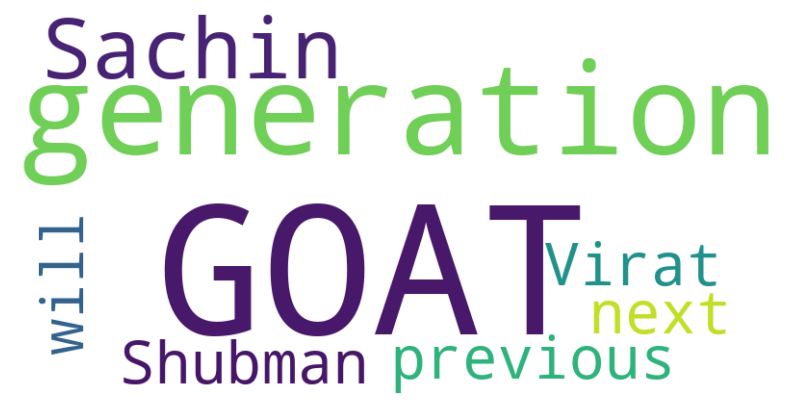

In [2]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define your corpus
corpus = [
    "Sachin was the GOAT of the previous generation",
    "Virat is the GOAT of the this generation",
    "Shubman will be the GOAT of the next generation"
]

# Join all the sentences into a single string
text = " ".join(corpus)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')  # Bilinear interpolation for smooth image
plt.axis('off')  # Hide the axis
plt.show()
